<h1  align="center"><b> MODELO ARMA </b></h1>

`Objetivo Geral:` Importar a série temporal transformada dos dados pluviométricos do município de São Paulo e realizar a modelagem ARIMA (Auto-Regressiva Integrada de Média Móvel) para previsão.

`Dados:` Os dados foram transformados na pasta [Transformação e Decomposição](../[3]%20Transformação%20e%20Decomposição%20-%20Projeto%20Chuva/) do Projeto Chuva.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

<h2 align="center"><b> Importando Dados e Escolhendo o Modelo </b></h2>
&emsp;&emsp; O modelo ARIMA é a combinação do modelo ARMA com a parte de transformação por diferenciação (para tornar a série estacionária). Para escolher o melhor modelo utilizaremos o critério de informação de Akaike (AIC) que quanto menor melhor.

`Observação:` ARIMA(p,d,q).

In [2]:
série_chuva = pd.read_csv('../[3] Transformação e Decomposição - Projeto Chuva/Série Transformada - Chuva Mensal.csv', sep = ';', index_col = 0)
série_chuva = pd.Series(série_chuva['Chuva Mensal (mm)'])
série_chuva.index = pd.date_range('1985', periods = len(série_chuva), freq = 'M')

In [3]:
from statsmodels.tsa.arima.model import ARIMA
modelo_ARIMA = ARIMA(série_chuva, order = (2, 1, 2)) # Utilizamos os parâmetros do modelo ARMA, pois como a série já é estacionária, a diferenciação não é necessária (e pode até prejudicar o modelo).

resultado_ARIMA = modelo_ARIMA.fit() # Treinando o modelo
print(resultado_ARIMA.summary()) # Sumário do modelo

c:\Users\Atual\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\Atual\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:      Chuva Mensal (mm)   No. Observations:                  456
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -785.057
Date:                Sun, 24 Dec 2023   AIC                           1580.113
Time:                        16:59:34   BIC                           1600.715
Sample:                    01-31-1985   HQIC                          1588.229
                         - 12-31-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4786      0.054     -8.941      0.000      -0.583      -0.374
ar.L2          0.5086      0.049     10.367      0.000       0.412       0.605
ma.L1         -0.0204      0.579     -0.035      0.9

<h2 align="center"><b> Análise de Resíduos </b></h2>

In [ ]:
resíduo = resultado_ARIMA.resid
resíduo.plot() # Plotando o resíduo
plt.show()

![ARIMA_Residuos](./Gráficos/ARIMA_Residuos.png)

### `Normalidade dos Resíduos:`

In [5]:
import scipy.stats as stats
import seaborn as sns

In [ ]:
stats.probplot(resíduo, dist = 'norm', plot = plt)
plt.title('Normal QQ Plot - Resíduos')
plt.show()

sns.histplot(resíduo, kde = True)
plt.title('Histograma - Resíduos')
plt.show()

![Normal QQ Plot - Resíduos](./Gráficos/Normal%20QQ%20Plot%20-%20Resíduos.png)
![Histograma - Resíduos](./Gráficos/Histograma%20-%20Resíduos.png)

In [7]:
def teste_shapiro(série):
    e, p = stats.shapiro(série)
    print(f'Estatística de Teste = {e}')
    print(f'p-valor = {p}')
    print(f'Resultado: {"É Normal" if (p > 0.05) else "Não é Normal"}')

teste_shapiro(resíduo)

Estatística de Teste = 0.9766622185707092
p-valor = 1.0990354439854855e-06
Resultado: Não é Normal


&emsp;&emsp; Esse modelo ficou pior que só com a transformação por raiz cúbica. Então é esperado que a previsão não seja tão boa.

### `Autocorrelação dos Resíduos:`

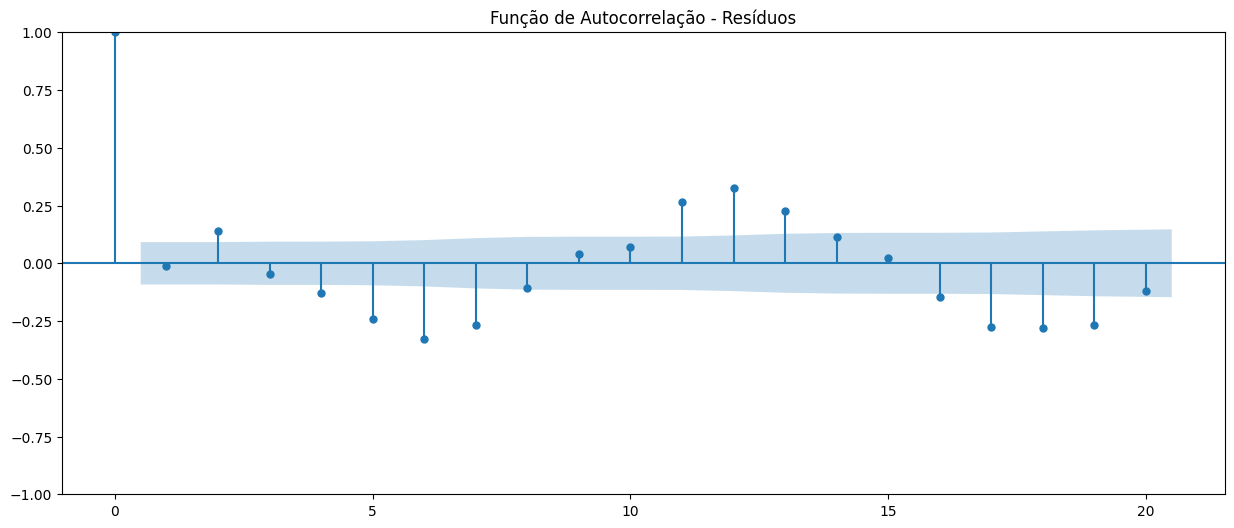

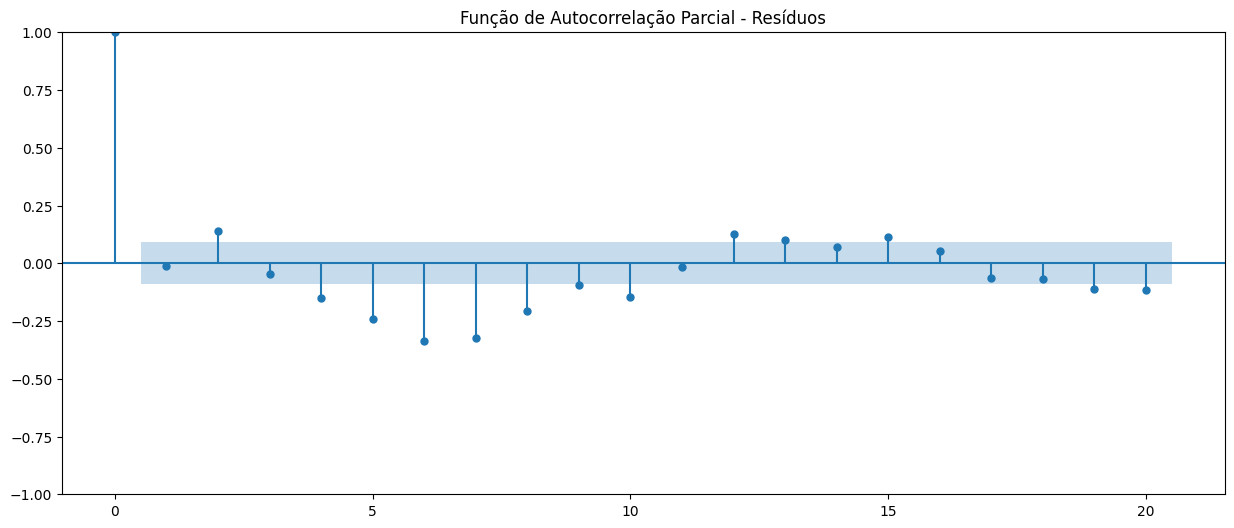

In [8]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(resíduo, lags = 20)
plt.title('Função de Autocorrelação - Resíduos')
plt.show()

plot_pacf(resíduo, lags = 20)
plt.title('Função de Autocorrelação Parcial - Resíduos')
plt.show()

![Função de Autocorrelação - Resíduos](./Gráficos/Função%20de%20Autocorrelação%20-%20Resíduos.png)
![Função de Autocorrelação Parcial - Resíduos](./Gráficos/Função%20de%20Autocorrelação%20Parcial%20-%20Resíduos.png)

&emsp;&emsp; As funções de autocorrelação mostram que os resíduos possuem correlação com os valores passados, o que é um péssimo sinal.

<h2 align="center"><b> Previsão </b></h2>

In [14]:
tamanho_série = len(série_chuva) # Tamanho da série
previsão = resultado_ARIMA.predict(start = tamanho_série, end = tamanho_série + 11) # Previsão para os próximos 12 meses

In [15]:
previsão2 = resultado_ARIMA.forecast(steps = 12) # Método alternativo para previsão

In [ ]:
plt.plot(série_chuva, label = 'Série Original')
plt.plot(série_chuva - resíduo, label = 'Resíduo')
plt.plot(previsão, label = 'Previsão')
plt.title('Previsão - Modelo ARIMA(2, 1, 2)')
plt.legend(loc = 'best')
plt.show()

![Previsão - Modelo ARIMA(2, 1, 2)](./Gráficos/Previsão%20-%20Modelo%20ARIMA(2,%201,%202).png)

&emsp;&emsp; Finalmente chegamos na previsão, mas esses valores passaram por uma transformação por raiz cúbica, então precisamos elevar os valores ao cubo para obter a previsão real.

<h2 align="center"><b> Finalização </b></h2>

In [18]:
previsão_final = previsão ** 3
previsão_final.name = 'Chuva Mensal (mm)'
previsão_final.to_csv('Previsão ARMA - Chuva Mensal.csv', sep = ';', header = True) # Salvando a previsão em um arquivo csv
display(previsão_final)

2023-01-31    155.452224
2023-02-28    127.952648
2023-03-31    121.959505
2023-04-30    112.367016
2023-05-31    114.000436
2023-06-30    108.513128
2023-07-31    111.939325
2023-08-31    107.538875
2023-09-30    111.375730
2023-10-31    107.308035
2023-11-30    111.202805
2023-12-31    107.271480
Freq: M, Name: Chuva Mensal (mm), dtype: float64

In [19]:
Erro_Quadrático_Médio = (previsão_final['2023-01-31'] - 377.60)**2
Erro_Quadrático_Médio += (previsão_final['2023-02-28'] - 452.00)**2
Erro_Quadrático_Médio += (previsão_final['2023-03-31'] - 138.20)**2
Erro_Quadrático_Médio += (previsão_final['2023-04-30 '] - 165.70)**2
Erro_Quadrático_Médio += (previsão_final['2023-05-31'] - 43.30)**2
Erro_Quadrático_Médio += (previsão_final['2023-06-30'] - 85.20)**2
Erro_Quadrático_Médio += (previsão_final['2023-07-31'] - 15.00)**2
Erro_Quadrático_Médio = Erro_Quadrático_Médio / 7

print(f'Erro Quadrático Médio = {Erro_Quadrático_Médio:.2f}') # Erro Quadrático Médio

Erro Quadrático Médio = 24629.11
